# 全连接神经网络

In [1]:
import mindspore
import mindspore.nn as nn
import numpy as np
from mindspore import Tensor

# 构造输入张量
# 两个样本，每个样本有3个输入
input = Tensor(np.array([[1, 1, 1], [2, 2, 2]]), mindspore.float32)
print(input)

# 构造全连接网络，输入通道为3，输出通道为5
net = nn.Dense(in_channels=3, out_channels=5, weight_init=1)
output = net(input)
print(output) 

[[1. 1. 1.]
 [2. 2. 2.]]
[[3. 3. 3. 3. 3.]
 [6. 6. 6. 6. 6.]]


# 卷积神经网络

In [2]:
import mindspore
import mindspore.nn as nn
from mindspore import Tensor

# mindspore.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, pad_mode='same', padding=0, dilation=1, 
#                     group=1, has_bias=False, weight_init='normal', bias_init='zeros', data_format='NCHW')

# 图片数，通道数，图像高，图像宽
input = Tensor(np.ones([1, 3, 1080, 960]), mindspore.float32) 

# 输入通道数为3，输出通道数为24， 卷积核大小为5， 步长为1，padding方式same，有偏置项，权重初始化为normal
net = nn.Conv2d(in_channels=3, out_channels=24, kernel_size=5, stride=1, pad_mode='same', has_bias=True, weight_init='normal')

# 图片数，通道数，图像高，图像宽
output = net(input).shape
print(output)

(1, 24, 1080, 960)


# 激活函数

In [3]:
input_x = Tensor(np.array([-1, 2, -3, 2, -1]), mindspore.float16)

relu = nn.ReLU()
output = relu(input_x)
print(output)  

[0. 2. 0. 2. 0.]


# 池化层

In [4]:
input_x = np.random.randint(0, 10, [1, 2, 4, 4])
print(input_x)
print("-----------------------------------")

# 最大池化，池化大小2x2， 步长为2
pool = nn.MaxPool2d(kernel_size=2, stride=2)

output = pool(Tensor(input_x, mindspore.float32))  
print(output)

[[[[5 1 3 6]
   [1 7 0 9]
   [4 8 9 2]
   [8 8 4 8]]

  [[7 1 8 5]
   [7 8 3 4]
   [7 2 9 4]
   [6 5 8 4]]]]
-----------------------------------
[[[[7. 9.]
   [8. 9.]]

  [[8. 8.]
   [7. 9.]]]]


# Flatten层

In [5]:
from mindspore import Tensor
import mindspore
import mindspore.nn as nn

input = Tensor(np.array([[[1, 1], [2, 2]], [[3, 3], [4, 4]]]), mindspore.float32)
print(input)
print("-----------------------------------")

net = nn.Flatten()
output = net(input)
print(output)

[[[1. 1.]
  [2. 2.]]

 [[3. 3.]
  [4. 4.]]]
-----------------------------------
[[1. 1. 2. 2.]
 [3. 3. 4. 4.]]


# 搭建LeNet-5网络

- ## LeNet5网络模型

In [6]:
import mindspore.nn as nn # 各类网络层都在nn里面
from mindspore.common.initializer import Normal # 参数初始化

class LeNet5(nn.Cell):
    
    # 定义算子
    def __init__(self, num_class=10, num_channel=1):
        super(LeNet5, self).__init__()
        # 卷积层
        self.conv1 = nn.Conv2d(num_channel, 6, 5, pad_mode='valid')
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid')
        
        # 全连接层
        self.fc1 = nn.Dense(4 * 4 * 16, 120, weight_init=Normal(0.02))
        self.fc2 = nn.Dense(120, 84, weight_init=Normal(0.02))
        self.fc3 = nn.Dense(84, num_class, weight_init=Normal(0.02))
        
        # 激活函数
        self.relu = nn.ReLU()
        
        # 最大池化成
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # 网络展开
        self.flatten = nn.Flatten()
        
    # 建构网络
    def construct(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
    
# 定义神经网络
lenet = LeNet5()

- ## 损失函数

In [7]:
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True,reduction="mean") 

- ## 优化器

In [8]:
# 定义优化器
lr = 0.01
momentum = 0.9
net_opt = nn.Momentum(lenet.trainable_params(), lr, momentum) 

- ## 模型编译

In [9]:
from mindspore import Model # 承载网络结构
from mindspore.nn.metrics import Accuracy # 测试模型用

# 模型编译
model = Model(lenet, net_loss, net_opt, metrics={'accuracy': Accuracy()}) 

- ## 模型训练


- - #### 实验数据下载

https://zhuanyejianshe.obs.cn-north-4.myhuaweicloud.com/chuangxinshijianke/cv-nlp/MNIST.zip 

- - #### 引入数据集

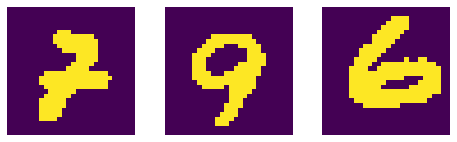

In [10]:
import os
import mindspore.dataset as ds   # 数据集的载入
import matplotlib.pyplot as plt

dataset_dir = "./MNIST/train"  # 数据集路径

# 从mnist dataset读取3张图片
mnist_dataset = ds.MnistDataset(dataset_dir=dataset_dir, num_samples=3)

# 设置图像大小
plt.figure(figsize=(8,8))
i = 1

# 打印3张子图
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3,3,i)
    plt.imshow(dic['image'][:,:,0])
    plt.axis('off')
    i +=1
plt.show() 

import mindspore.dataset.transforms.c_transforms as C # 常用转化算子
import mindspore.dataset.vision.c_transforms as CV # 图像转化算子
from mindspore.common import dtype as mstype # 数据形态转换
from mindspore.common.initializer import Normal # 参数初始化

def create_dataset(data_path, batch_size=32):
    """ 
    数据预处理与批量输出的函数
    
    Args:
        data_path: 数据路径
        batch_size: 批量大小
    """
    
    # 加载数据集
    data = ds.MnistDataset(data_path)
    
    # 打乱数据集
    data = data.shuffle(buffer_size=10000)
    
    # 数据标准化参数
    # MNIST数据集的 mean = 33.3285，std = 78.5655
    mean, std = 33.3285, 78.5655 

    # 定义算子
    nml_op = lambda x : np.float32((x-mean)/std) # 数据标准化，image = (image-mean)/std
    hwc2chw_op = CV.HWC2CHW() # 通道前移（为配适网络，CHW的格式可最佳发挥昇腾芯片算力）
    type_cast_op = C.TypeCast(mstype.int32) # 原始数据的标签是unint，计算损失需要int

    # 算子运算
    data = data.map(operations=type_cast_op, input_columns='label')
    data = data.map(operations=nml_op, input_columns='image')
    data = data.map(operations=hwc2chw_op, input_columns='image')

    # 批处理
    data = data.batch(batch_size)
    
    # 重复
    data = data.repeat(1)

    return data

train_path = os.path.join('MNIST','train') # 训练集路径
train_data = create_dataset(train_path) # 定义训练数据集

test_path = os.path.join('MNIST','test') # 测试集路径
test_data = create_dataset(test_path) # 定义测试数据集 

- - #### 模型训练

In [11]:
#设定loss监控
from mindspore.train.callback import LossMonitor
loss_cb = LossMonitor(per_print_times=train_data.get_dataset_size())
# 训练模型
model.train(3, train_data, loss_cb) # 训练3个epoch 

[WARNING] ME(27532:25144,MainProcess):2022-11-27-15:07:49.754.843 [mindspore\train\model.py:500] The CPU cannot support dataset sink mode currently.So the training process will be performed with dataset not sink.


epoch: 1 step: 1875, loss is 0.038763184
epoch: 2 step: 1875, loss is 0.17519149
epoch: 3 step: 1875, loss is 0.21999122


- ## 模型评估

In [12]:
# 评估模型
model.eval(test_data) # 测试网络

[WARNING] ME(27532:25144,MainProcess):2022-11-27-15:08:25.524.974 [mindspore\train\model.py:893] CPU cannot support dataset sink mode currently.So the evaluating process will be performed with dataset non-sink mode.


{'accuracy': 0.981}